In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np;

In [2]:
df=pd.read_csv(r"file/npl_2024_ball_by_ball.csv")
df = df.apply(lambda col: col.str.lower() if col.dtype == "object" else col)
df.head(20)


,match_id,date,batting_team,bowling_team,inning,over,ball,batter,batting_side,non_striker,...,runs_batter,runs_extras,runs_total,is_wicket,wicket_kind,player_out,year,month,day,bowling_category
0,1462596,2024-11-30,brk,jkb,1,0,0,lokesh bam,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,pace
1,1462596,2024-11-30,brk,jkb,1,0,1,lokesh bam,r,mj guptill,...,4,0,4,False,NaN,NaN,2024,11,30,pace
2,1462596,2024-11-30,brk,jkb,1,0,2,lokesh bam,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,pace
3,1462596,2024-11-30,brk,jkb,1,0,3,lokesh bam,r,mj guptill,...,0,1,1,False,NaN,NaN,2024,11,30,pace
4,1462596,2024-11-30,brk,jkb,1,0,4,lokesh bam,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,pace
5,1462596,2024-11-30,brk,jkb,1,0,5,lokesh bam,r,mj guptill,...,1,0,1,False,NaN,NaN,2024,11,30,pace
6,1462596,2024-11-30,brk,jkb,1,0,6,mj guptill,r,lokesh bam,...,0,0,0,False,NaN,NaN,2024,11,30,pace
7,1462596,2024-11-30,brk,jkb,1,1,0,lokesh bam,r,mj guptill,...,0,0,0,True,bowled,lokesh bam,2024,11,30,spin
8,1462596,2024-11-30,brk,jkb,1,1,1,aqib ilyas,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,spin
9,1462596,2024-11-30,brk,jkb,1,1,2,aqib ilyas,r,mj guptill,...,0,0,0,False,NaN,NaN,2024,11,30,spin


In [3]:
df["bowling_type"].unique()

array(['right arm medium fast', 'slow left arm orthodox',
       'right arm legbreak', 'left arm wrist spin', 'right arm offbreak',
       'right arm fast medium', 'left arm medium', 'legbreak googly',
       'left arm medium fast', 'right arm medium', 'right arm fast',
       'left arm fast medium'], dtype=object)

In [4]:
#best SR 
total_run=df.groupby("batter")["runs_batter"].sum()
total_run.sort_values(ascending=False,inplace=True)
balls_faced =df["batter"].value_counts()
batter_sr_df = pd.DataFrame({
    "runs": total_run,
    "balls_faced": balls_faced
})
batter_sr_df["strike_rate"] = (batter_sr_df["runs"] / batter_sr_df["balls_faced"]) * 100
batter_sr_df.sort_values(by="strike_rate", ascending=False, inplace=True)

batter_sr_df.head(30)

,runs,balls_faced,strike_rate
batter,,,
jds neesham,247,127,194.488189
ags gous,225,138,163.043478
nar sarki,22,14,157.142857
ds airee,227,148,153.378378
as routela,85,57,149.122807
sc kuggeleijn,66,45,146.666667
sompal kami,52,37,140.540541
m levitt,102,75,136.000000
b yadav,100,75,133.333333


In [5]:
df["bowling_type"] = df["bowling_type"].replace("left arm orthodox", "slow left arm orthodox")

df["runs_score"]


KeyError: 'runs_score'

In [ ]:
df.head(20)

,match_id,date,batting_team,bowling_team,inning,over,ball,batter,batting_side,non_striker,...,bowling_type,runs_batter,runs_extras,runs_total,is_wicket,wicket_kind,player_out,year,month,day
0,1462596,2024-11-30,biratnagar kings,janakpur bolts,1,0,0,lokesh bam,r,mj guptill,...,right arm medium fast,0,0,0,False,NaN,NaN,2024,11,30
1,1462596,2024-11-30,biratnagar kings,janakpur bolts,1,0,1,lokesh bam,r,mj guptill,...,right arm medium fast,4,0,4,False,NaN,NaN,2024,11,30
2,1462596,2024-11-30,biratnagar kings,janakpur bolts,1,0,2,lokesh bam,r,mj guptill,...,right arm medium fast,0,0,0,False,NaN,NaN,2024,11,30
3,1462596,2024-11-30,biratnagar kings,janakpur bolts,1,0,3,lokesh bam,r,mj guptill,...,right arm medium fast,0,1,1,False,NaN,NaN,2024,11,30
4,1462596,2024-11-30,biratnagar kings,janakpur bolts,1,0,4,lokesh bam,r,mj guptill,...,right arm medium fast,0,0,0,False,NaN,NaN,2024,11,30
5,1462596,2024-11-30,biratnagar kings,janakpur bolts,1,0,5,lokesh bam,r,mj guptill,...,right arm medium fast,1,0,1,False,NaN,NaN,2024,11,30
6,1462596,2024-11-30,biratnagar kings,janakpur bolts,1,0,6,mj guptill,r,lokesh bam,...,right arm medium fast,0,0,0,False,NaN,NaN,2024,11,30
7,1462596,2024-11-30,biratnagar kings,janakpur bolts,1,1,0,lokesh bam,r,mj guptill,...,slow left arm orthodox,0,0,0,True,bowled,lokesh bam,2024,11,30
8,1462596,2024-11-30,biratnagar kings,janakpur bolts,1,1,1,aqib ilyas,r,mj guptill,...,slow left arm orthodox,0,0,0,False,NaN,NaN,2024,11,30
9,1462596,2024-11-30,biratnagar kings,janakpur bolts,1,1,2,aqib ilyas,r,mj guptill,...,slow left arm orthodox,0,0,0,False,NaN,NaN,2024,11,30


In [ ]:

valid_dismissals = ["bowled", "caught", "lbw", "stumped", "caught and bowled"]
df["is_bowler_wicket"] = df["wicket_kind"].isin(valid_dismissals)
matchups_bowling_type = (
    df.groupby(["batter", "bowling_type"])
    .agg(
        balls_faced=("batter", "count"),
        runs_scored=("runs_batter", "sum"),
        dismissals=("is_bowler_wicket", "sum")
    )
    .reset_index()
)
matchups_bowling_type["strike_rate"] = (matchups_bowling_type["runs_scored"] / matchups_bowling_type["balls_faced"]) * 100
matchups_bowling_type["strike_rate"] = matchups_bowling_type["strike_rate"].round(2)

matchups_bowling_type[matchups_bowling_type["bowling_type"]=="right arm offbreak"].sort_values(by=["runs_scored","strike_rate"],ascending=False).head(30)


,batter,bowling_type,balls_faced,runs_scored,dismissals,strike_rate
349,jds neesham,right arm offbreak,31,77,1,248.39
569,rs bopara,right arm offbreak,41,65,2,158.54
187,bkel milantha,right arm offbreak,44,54,3,122.73
391,kushal malla,right arm offbreak,70,54,0,77.14
719,tj moores,right arm offbreak,36,51,2,141.67
650,sa zaib,right arm offbreak,43,48,1,111.63
108,b bhandari,right arm offbreak,41,47,2,114.63
199,cak walton,right arm offbreak,27,44,2,162.96
280,ds airee,right arm offbreak,33,40,0,121.21
541,rk paudel,right arm offbreak,30,32,1,106.67


In [ ]:
bowling_type_matchups=matchups_bowling_type.groupby("bowling_type").agg(
    total_ball_bowls=("balls_faced",'sum'),
    total_runs_given=("runs_batter",'sum'),
    total_dissmisals=("dismissals","sum")
)
bowling_type_matchups["strike_rate"]=(bowling_type_matchups["total_runs_given"] / bowling_type_matchups["total_ball_bowls"]) * 100
bowling_type_matchups.sort_values(by="strike_rate",ascending=False)

NameError: name 'matchups_bowling_type' is not defined

<Axes: xlabel='strike_rate', ylabel='Count'>

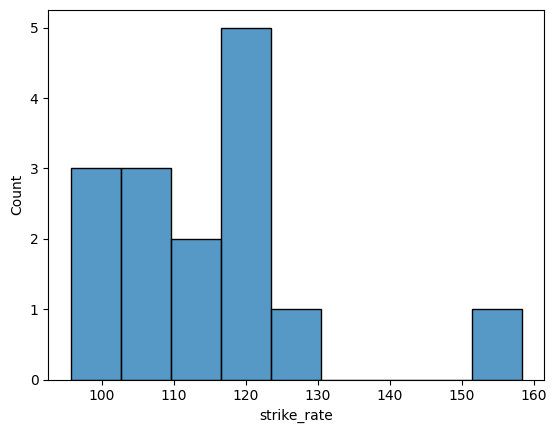

In [ ]:
sns.histplot(bowling_type_matchups["strike_rate"],bins=9)

In [ ]:
df["match_id"].nunique()


32

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df["is_wicket"].value_counts()


is_wicket
False    7043
True      455
Name: count, dtype: int64

In [ ]:
df["wicket_kind"].value_counts()


wicket_kind
caught               224
bowled                96
lbw                   69
run out               42
stumped               14
caught and bowled      9
retired out            1
Name: count, dtype: int64

In [ ]:
df[df["bowling_type"].isna()]["bowler"].unique()


array([], dtype=object)

In [ ]:
batter=df["batter"].unique()
batter

array(['lokesh bam', 'mj guptill', 'aqib ilyas', 'nr kirton',
       'basir ahamad', 'rp magar', 'pratis gc', 's lamichhane', 'cb sole',
       'jk mukhiya', 'a kharel', 'ak sah', 'aasif sheikh',
       'bkel milantha', 'h thaker', 'ss eskinazi', 'm levitt',
       's maharjan', 'mg erasmus', 'b sharki', 'shankar rana',
       'rashid khan', 'da douthwaite', 'karan kc', 'shahab alam',
       'd kandel', 'hassan eisakhil', 'deepak bohara', 'lm benkenstein',
       'kushal malla', 'rs bopara', 's karki', 's vesawkar', 'd khanal',
       's dhawan', 'cak walton', 'babar hayat', 'zeeshan maqsood',
       'gulsan jha', 'a gharti', 'sompal kami', 'jds neesham',
       'a shrestha', 'b bhandari', 'bj mcmullen', 'aarif sheikh',
       'sa zaib', 'i pandey', 'ds airee', 'sc kuggeleijn', 'b khatri',
       'ismat alam', 'd bohara', 'sohail tanvir', 'as routela',
       'k bhurtel', 'd nath', 'bfw de leede', 'd kharel', 'k thagunna',
       'ra reifer', 'ma leask', 'mjj critchley', 'n joshi',
   

In [ ]:
import pandas as pd

# Your batting_side_map dictionary (paste your full dictionary here)
batting_side_map = {
    'lokesh bam': 'R',
    'mj guptill': 'R',
    'aqib ilyas': 'R',
    'nr kirton': 'L',
    'basir ahamad': 'L',
    'rp magar': 'R',
    'pratis gc': 'R',
    's lamichhane': 'R',
    'cb sole': 'R',
    'jk mukhiya': 'R',
    'a kharel': 'R',
    'ak sah': 'R',
    'aasif sheikh': 'R',
    'bkel milantha': 'R',
    'h thaker': 'R',
    'ss eskinazi': 'R',
    'm levitt': 'R',
    's maharjan': 'L',
    'mg erasmus': 'R',
    'b sharki': 'R',
    'shankar rana': 'R',
    'rashid khan': 'R',
    'da douthwaite': 'R',
    'karan kc': 'R',
    'shahab alam': 'R',
    'd kandel': 'R',
    'hassan eisakhil': 'R',
    'deepak bohara': 'R',
    'lm benkenstein': 'R',
    'kushal malla': 'L',
    'rs bopara': 'R',
    's karki': 'R',
    's vesawkar': 'L',
    'd khanal': 'R',
    's dhawan': 'R',
    'cak walton': 'R',
    'babar hayat': 'L',
    'zeeshan maqsood': 'R',
    'gulsan jha': 'L',
    'a gharti': 'R',
    'sompal kami': 'R',
    'jds neesham': 'R',
    'a shrestha': 'R',
    'b bhandari': 'R',
    'bj mcmullen': 'R',
    'aarif sheikh': 'R',
    'sa zaib': 'R',
    'i pandey': 'R',
    'ds airee': 'R',
    'sc kuggeleijn': 'R',
    'b khatri': 'R',
    'ismat alam': 'R',
    'd bohara': 'R',
    'sohail tanvir': 'R',
    'as routela': 'R',
    'k bhurtel': 'R',
    'd nath': 'R',
    'bfw de leede': 'R',
    'd kharel': 'R',
    'k thagunna': 'R',
    'ra reifer': 'R',
    'ma leask': 'R',
    'mjj critchley': 'R',
    'n joshi': 'R',
    'bipin khatri': 'R',
    's dhakal': 'R',
    'a ghiraiya': 'R',
    'a saud': 'R',
    'rk paudel': 'R',
    'tj moores': 'R',
    's jora': 'R',
    'saad bin zafar': 'R',
    'bcj cutting': 'R',
    'b yadav': 'R',
    'rr simmonds': 'R',
    'ags gous': 'R',
    'rohan mustafa': 'R',
    'p shrestha': 'R',
    'na sowter': 'R',
    'b rawal': 'R',
    'jn loftie-eaton': 'R',
    'ubt chand': 'R',
    'd adhikari': 'R',
    'surya tamang': 'R',
    'd gupta': 'R',
    'wg bosisto': 'R',
    'nk yadav': 'R',
    'ubs thakuri': 'R',
    'bp sharma': 'R',
    'n bhatta': 'R',
    's kansakar': 'R',
    'mohammad mohsin': 'R',
    's malla': 'R',
    'h dhami': 'R',
    'ln rajbanshi': 'R',
    'ds bajwa': 'R',
    'nb budayair': 'R',
    'n saud': 'R',
    'r dhakal': 'R',
    'nar sarki': 'R',
    'aakash chand': 'R',
    'harmeet singh': 'R',
    'a bohara': 'R',
    'j tromp': 'R',
    'a yadav': 'R',
    'k mahato': 'R',
    'abhishesh gautam': 'R',
    'sa edwards': 'R',
    'z malik': 'R',
    'tr das': 'R',
    'tr bhandari': 'R',
    'basil hameed': 'R',
    'aakarshit gomel': 'R',
    'subash bhandari': 'R',
    'rit gautam': 'R',
    'ja kolsawala': 'R',
    'a tripathi': 'R',
    'mayan yadav': 'R',
}

# Load your CSV file
df = pd.read_csv(r'file/npl_ball_by_ball.csv')

# Normalize batsman names in the CSV (optional, to lowercase to match keys)
df['batsman_norm'] = df['batter'].str.lower().str.strip()

# Map batting side using the dictionary, default to 'Unknown' if not found
df['batting_side'] = df['batsman_norm'].map(batting_side_map).fillna('Unknown')

# Drop helper column
df.drop(columns=['batsman_norm'], inplace=True)

# Save updated CSV
df.to_csv('npl_ball_by_ball_with_batting_side.csv', index=False)

print("Updated CSV saved as 'npl_ball_by_ball_with_batting_side.csv'")


FileNotFoundError: [Errno 2] No such file or directory: 'file/npl_ball_by_ball.csv'

In [ ]:
df["batting_side"].unique()

array(['R', 'L'], dtype=object)